# MLP 모델 불러와서 사용하기
by uramoon@kw.ac.kr
(<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)

시작하기 전에:
1. 왼쪽 폴더 모양의 아이콘 (파일)을 클릭
2. 화살표가 위로 향해있는 아이콘을 클릭하여 지난 주에 제출한 MNIST 예측 모델 업로드 (.keras)<br>(우수과제 모델 사용 가능)

지난 시간에 MNIST 데이터셋으로 훈련한 모델을 불러와 직접 그린 숫자에 대해 예측을 수행할 것입니다.

## TODO1: 훈련 끝난 MNIST 모델 불러오기
load_model 함수 이용 (예: load_model('my_mnist.keras'))

In [13]:
import keras
from keras.models import load_model

# load_model 함수에 파일 이름 입력하기
model = load_model('mnist_model.keras')

## TODO2: 숫자가 적힌 PNG 파일 만들어 업로드하기
1. 그림판을 연다.
2. 정사각형 모양의 캔버스를 만든다. (예: 400 x 400 px)
3. 최대한 굵은 브러시로 숫자를 0부터 9까지 최대한 크게 써서 저장한다. (예: 0은 0.png)
4. 로컬에 저장된 10개의 파일을 Colab에 업로드한다. (왼쪽 파일 아이콘 및 업로드 아이콘 클릭)
5. 직접 그린 10개의 그림은 과제 제출할 때 함께 업로드한다.

## PNG 파일 변환 함수

In [14]:
# image_prepare(이미지 파일이름)으로 호출하면 정규화된 일차원 배열을 반환합니다.
# 코드를 이해할 필요는 없습니다.

import numpy as np
from PIL import Image, ImageFilter

def image_prepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.LANCZOS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.LANCZOS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]

    return np.array(tva)

## TODO3: PNG파일을 우리 모델이 읽을 수 있는 형태로 변환하기 (다른 방식으로 자유롭게 수행 가능)
1. 모양이 (10, 784)인 빈 배열을 만든다. (그림 10장, 한 장당 784개 픽셀)
2. 0.png부터 9.png까지 차례대로 하나씩 image_prepare 함수를 이용하여 변환 후 배열에 넣는다.

In [15]:
import numpy as np

# img_arr[0]에는 0.png, img_arr[1]에는 1.png, ...
img_arr = np.zeros((10,784))
for i in range(10):
  img_arr[i] = image_prepare(str(i)+'.png')

##TODO4: 잘 변환됐나 그림으로 확인하기

상기 리스트에 저장된 그림들은 우리가 만든 모델이 읽을 수 있도록 일차원 배열 형태로 저장되어 있습니다. (784, )<br>
사람이 matplotlib을 통해 그림으로 확인하기 위해서는 (28, 28)로 변환할 필요가 있습니다.

1. 상기 리스트에서 그림을 하나씩 꺼내 reshape하여 임의의 변수에 저장한다. (784, ) -> (28, 28)
2. matplotlib으로 그림을 확인한다.

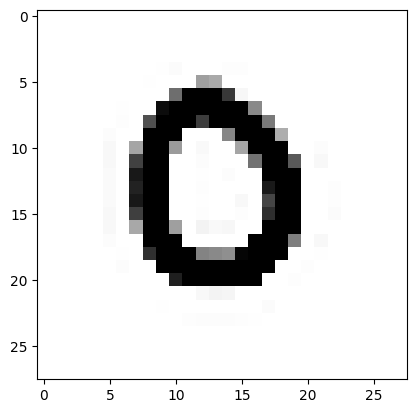

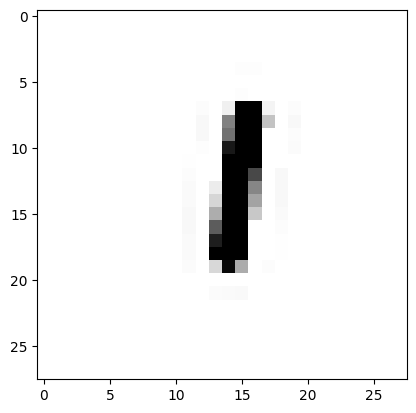

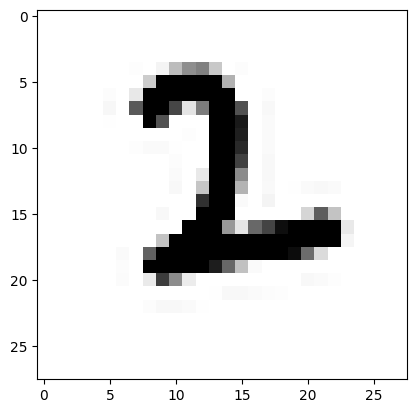

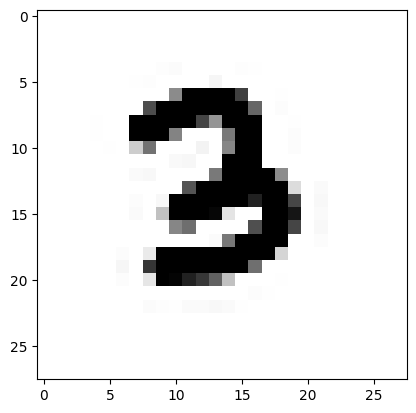

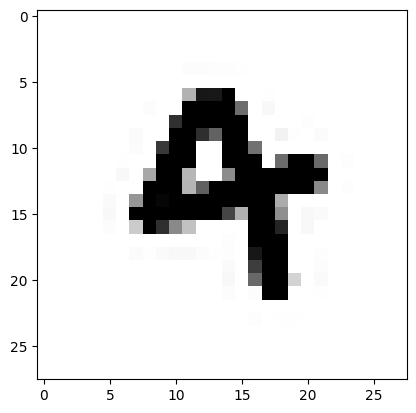

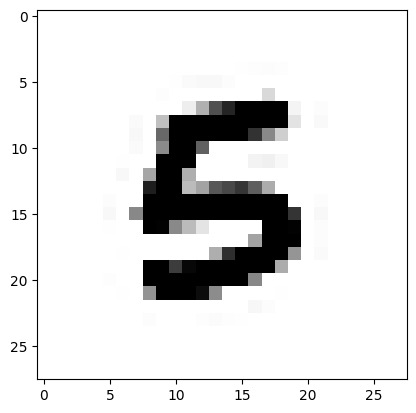

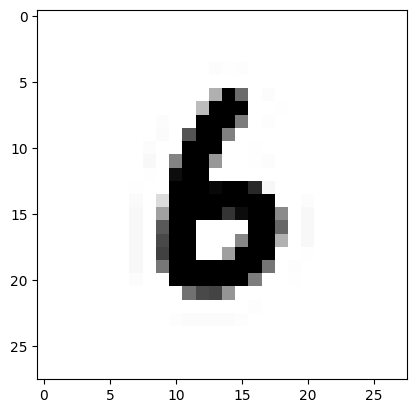

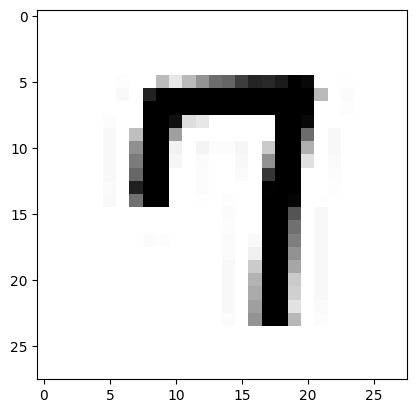

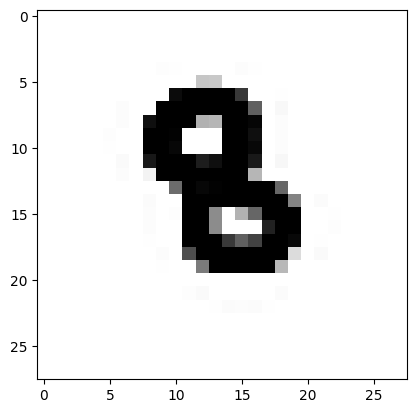

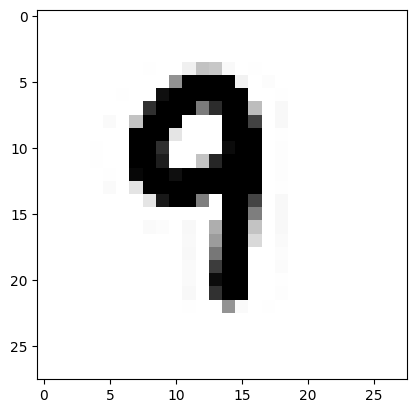

In [16]:
import matplotlib.pyplot as plt

for img in img_arr:
  digit = img.reshape(28, 28)
  plt.imshow(digit, cmap=plt.cm.binary)
  plt.show()

## TODO5: 예측하여 눈으로 결과 확인하기
결과 하나하나에 np.argmax()를 사용하여 출력해보세요.<br>
(가장 큰 숫자가 위치한 인덱스를 반환하는 함수)

In [17]:
res = model.predict(img_arr)
# 0, 1, 2, ..., 9가 순서대로 나와야 이상적인 결과입니다.
for r in res:
  print(np.argmax(r))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
0
1
2
7
4
5
6
9
9
9


## TODO6: evaluate 함수로 성능 측정하기
1. 이미지에 대한 레이블 리스트를 만든다. (TODO1에서 불러온 모델은 훈련할 때 레이블을 one-hot 인코딩으로 변환하지 않았으니 편하게 0, 1, 2, ...로 작성)
2. evaluate 함수에 이미지 리스트와 레이블 리스트를 입력하여 성능을 측정한다.<br>(TODO5에서 눈으로 확인한 정확도와 일치해야 함)

In [18]:
# img_arr[n]은 n+1 번째 그림, lbl_arr[n]은 n+1 번째 레이블
lbl_arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
test_loss, test_acc = model.evaluate(img_arr, lbl_arr)
print('test_acc:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.7000 - loss: 2.2113
test_acc: 0.699999988079071


TODO5와 TODO6 결과가 실망스럽더라도 아무 문제 없으니 안심하세요.